In [1]:
x=1

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
task = 'pbmc_3_cond_balanced_end2end'
path = '/lustre/groups/ml01/projects/2022_multigrate_anastasia.litinetskaya/multimil_reproducibility/pipeline/data/reports/methods.tsv'

In [4]:
df = pd.read_csv(path, sep='\t', index_col=0)
df = df[df['task'] == task]
df = df[df['hash'].isin(['52e3c74810', 'dfbda3bb3e', '478fe63f05', '44ddcb1ef8'])]
df = df[df['epoch'] == 49.0]
df = df[df['query_epoch'] == 19.0]
df

,precision,recall,f1-score,support,split,method,hash,method_params,task,epoch,query_epoch
Unnamed: 0,,,,,,,,,,,
Healthy,0.873052,1.000000,0.932224,19834.000000,0,multigrate,44ddcb1ef8,"{'kl': 1e-06, 'lr': 0.0001, 'rna_indices_end':...",pbmc_3_cond_balanced_end2end,49.0,19.0
Mild,0.931326,0.630672,0.752064,24772.000000,0,multigrate,44ddcb1ef8,"{'kl': 1e-06, 'lr': 0.0001, 'rna_indices_end':...",pbmc_3_cond_balanced_end2end,49.0,19.0
Severe,0.013798,0.030740,0.019046,4164.000000,0,multigrate,44ddcb1ef8,"{'kl': 1e-06, 'lr': 0.0001, 'rna_indices_end':...",pbmc_3_cond_balanced_end2end,49.0,19.0
accuracy,0.729649,0.729649,0.729649,0.729649,0,multigrate,44ddcb1ef8,"{'kl': 1e-06, 'lr': 0.0001, 'rna_indices_end':...",pbmc_3_cond_balanced_end2end,49.0,19.0
macro avg,0.606059,0.553804,0.567778,48770.000000,0,multigrate,44ddcb1ef8,"{'kl': 1e-06, 'lr': 0.0001, 'rna_indices_end':...",pbmc_3_cond_balanced_end2end,49.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...
Mild,0.857143,0.042029,0.080129,18273.000000,4,multigrate,dfbda3bb3e,"{'kl': 1e-06, 'lr': 0.0001, 'rna_indices_end':...",pbmc_3_cond_balanced_end2end,49.0,19.0
Severe,0.740654,0.983130,0.844838,15175.000000,4,multigrate,dfbda3bb3e,"{'kl': 1e-06, 'lr': 0.0001, 'rna_indices_end':...",pbmc_3_cond_balanced_end2end,49.0,19.0
accuracy,0.646814,0.646814,0.646814,0.646814,4,multigrate,dfbda3bb3e,"{'kl': 1e-06, 'lr': 0.0001, 'rna_indices_end':...",pbmc_3_cond_balanced_end2end,49.0,19.0


In [5]:
np.unique(df['hash'])

array(['44ddcb1ef8', '478fe63f05', '52e3c74810', 'dfbda3bb3e'],
      dtype=object)

In [6]:
dfs = []
for h, coef in zip(np.unique(df['hash']), [100, 10, 0.1, 1.0]):
    df_tmp = df[df['hash'] == h]
    df_ = {'hash': h}
    for i in range(5):
        df_['split'] = i
        df_['accuracy'] = df_tmp[df_tmp['split'] == i]['f1-score']['accuracy']
        df_['coef'] = coef
        dfs.append(pd.DataFrame(df_, index=[0]))
dfs

[         hash  split  accuracy  coef
 0  44ddcb1ef8      0  0.729649   100,
          hash  split  accuracy  coef
 0  44ddcb1ef8      1  0.748863   100,
          hash  split  accuracy  coef
 0  44ddcb1ef8      2  0.881525   100,
          hash  split  accuracy  coef
 0  44ddcb1ef8      3  0.674205   100,
          hash  split  accuracy  coef
 0  44ddcb1ef8      4  0.753261   100,
          hash  split  accuracy  coef
 0  478fe63f05      0  0.760037    10,
          hash  split  accuracy  coef
 0  478fe63f05      1  0.775731    10,
          hash  split  accuracy  coef
 0  478fe63f05      2   0.82102    10,
          hash  split  accuracy  coef
 0  478fe63f05      3   0.80596    10,
          hash  split  accuracy  coef
 0  478fe63f05      4  0.634088    10,
          hash  split  accuracy  coef
 0  52e3c74810      0  0.648267   0.1,
          hash  split  accuracy  coef
 0  52e3c74810      1  0.702135   0.1,
          hash  split  accuracy  coef
 0  52e3c74810      2  0.693242   0.1,

In [7]:
df_ = pd.concat(dfs)

In [8]:
df_.groupby('hash').agg('mean')

,split,accuracy,coef
hash,,,
44ddcb1ef8,2.0,0.757501,100.0
478fe63f05,2.0,0.759367,10.0
52e3c74810,2.0,0.653803,0.1
dfbda3bb3e,2.0,0.733411,1.0


In [9]:
df_[df_['split'] == 0]

,hash,split,accuracy,coef
0,44ddcb1ef8,0,0.729649,100.0
0,478fe63f05,0,0.760037,10.0
0,52e3c74810,0,0.648267,0.1
0,dfbda3bb3e,0,0.705659,1.0


In [10]:
df_0 = df_[df_['split'] == 0]
df_0['log_coef'] = np.asarray(np.log(df_0['coef']), float)
df_0

/tmp/ipykernel_72233/754679410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['log_coef'] = np.asarray(np.log(df_0['coef']), float)


,hash,split,accuracy,coef,log_coef
0,44ddcb1ef8,0,0.729649,100.0,4.605170
0,478fe63f05,0,0.760037,10.0,2.302585
0,52e3c74810,0,0.648267,0.1,-2.302585
0,dfbda3bb3e,0,0.705659,1.0,0.000000


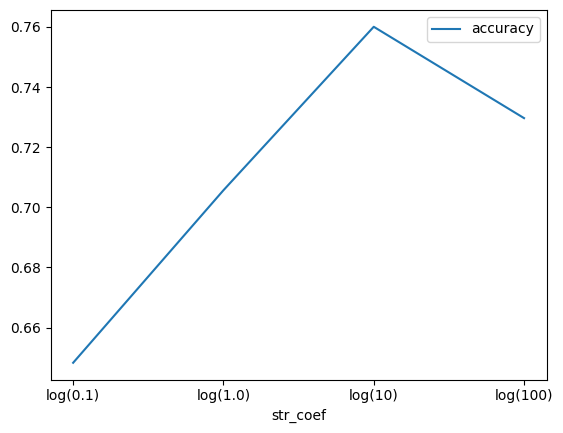

In [11]:
df_0 = df_0.sort_values('log_coef')
df_0['str_coef'] = ['log(0.1)', 'log(1.0)', 'log(10)', 'log(100)']
df_0.plot(x='str_coef', y='accuracy')
xticks = plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 2 == 0:
        xticks[i].set_visible(False)
plt.savefig('figures/line_class_coef_accuracies.svg', bbox_inches='tight')

In [12]:
df_[df_['split'] == 1]

,hash,split,accuracy,coef
0,44ddcb1ef8,1,0.748863,100.0
0,478fe63f05,1,0.775731,10.0
0,52e3c74810,1,0.702135,0.1
0,dfbda3bb3e,1,0.663957,1.0


In [13]:
df_[df_['split'] == 2]

,hash,split,accuracy,coef
0,44ddcb1ef8,2,0.881525,100.0
0,478fe63f05,2,0.821020,10.0
0,52e3c74810,2,0.693242,0.1
0,dfbda3bb3e,2,0.870448,1.0


In [14]:
df_[df_['split'] == 3]

,hash,split,accuracy,coef
0,44ddcb1ef8,3,0.674205,100.0
0,478fe63f05,3,0.805960,10.0
0,52e3c74810,3,0.761543,0.1
0,dfbda3bb3e,3,0.780175,1.0


In [15]:
df_[df_['split'] == 4]

,hash,split,accuracy,coef
0,44ddcb1ef8,4,0.753261,100.0
0,478fe63f05,4,0.634088,10.0
0,52e3c74810,4,0.463828,0.1
0,dfbda3bb3e,4,0.646814,1.0
